In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

import adaboost_m1

get_ipython().magic('load_ext autoreload')
get_ipython().magic('autoreload 2')

In [2]:
X_train, y_train, X_test, y_test = adaboost_m1.make_data()

There should an approximately equal numbers of positive and negative labels.

In [3]:
pd.Series(y_train).value_counts()

-1.0    1019
 1.0     981
dtype: int64

In [4]:
pd.Series(y_test).value_counts()

-1.0    5049
 1.0    4951
dtype: int64

# Algorithm 10.1

In [5]:
adaboost_classifier = adaboost_m1.adaboost_m1(X_train, y_train, num_learners=400)

100%|██████████| 400/400 [00:01<00:00, 330.42it/s]


In [6]:
errs_train = []
errs_test = []
n_learners_array = np.arange(1, 400, 10)
for n_learners in tqdm(n_learners_array):
    preds_train = adaboost_classifier.predict(X_train, use_n_learners=n_learners)
    preds_test = adaboost_classifier.predict(X_test, use_n_learners=n_learners)
    errs_train.append((preds_train != y_train).sum() / len(preds_train))
    errs_test.append((preds_test != y_test).sum() / len(preds_test))

100%|██████████| 40/40 [00:04<00:00,  8.59it/s]


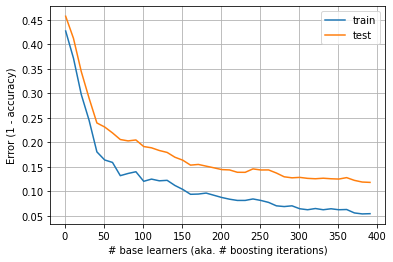

In [7]:
plt.plot(n_learners_array, errs_train, label='train')
plt.plot(n_learners_array, errs_test, label='test')
plt.ylabel('Error (1 - accuracy)')
plt.xlabel('# base learners (aka. # boosting iterations)')
plt.grid()
plt.legend()